# Introduction to Heuristic Search Algorithms

In the vast landscape of computer algorithms, search algorithms play a pivotal role in solving numerous complex problems. While traditional search algorithms often guarantee optimal solutions, they may not be feasible for large problem spaces due to excessive computational time. This is where heuristic search algorithms come into play.

## Why Heuristic Search Algorithms?

Heuristic search algorithms offer a trade-off: while they don't guarantee the optimal solution, they often provide a sufficiently good solution in a much shorter time. This makes them invaluable for real-world applications where time and resources are limited. Additionally, these algorithms are versatile, making them suitable for a myriad of problems, from game AI to operations research.

## What's the Difference?

1. **Hill Climbing**: This is a local search algorithm. It starts with a solution and iteratively refines it by making local adjustments. The risk? It might get stuck in local maxima.
   
2. **Random Restart Hill Climbing**: A variation of hill climbing where the algorithm is restarted from different random positions to avoid getting stuck in local optima.

3. **Simulated Annealing**: Inspired by the annealing process in metallurgy, it sometimes allows worse solutions in the hopes of escaping local optima, guided by a probability mechanism.

4. **Beam Search**: It's a version of breadth-first search that limits its search breadth to the best-performing candidates, ensuring more focused and faster search.

5. **Stochastic Beam Search**: A variant of beam search which introduces randomness in selecting the best candidates.

6. **Genetic Algorithms**: Inspired by the process of natural evolution, this algorithm reflects the process of natural selection where the fittest individuals are selected for reproduction.

7. **Modified Genetic Algorithm**: An enhanced version of the genetic algorithm with targeted mutation to better navigate the search space.

## The 8-Queens Problem: A Classic Testbed

The 8-Queens problem is a classic puzzle in computer science: Can you place 8 queens on an 8x8 chessboard so that no two queens threaten each other? Given the combinatorial nature of this problem (with a vast number of possible configurations), it becomes an excellent candidate to showcase the power of heuristic search algorithms. By using these algorithms, we aim to find a solution to this problem efficiently, demonstrating their potential in navigating large problem spaces quickly.

## Comparing Results and Performance

Towards the end of this notebook, we will embark on a comparative analysis of all the aforementioned algorithms. Our goal is to assess the running time and ability to find a solution.


In [1]:
from time import time
import random as rnd
from math import exp
import pandas as pd


In [2]:
def count_attacks(state):
    """Count the number of pairs of queens attacking each other in the given state."""
    ctr = 0
    for col1 in range(len(state)):
        for col2 in range(col1 + 1, len(state)):
            i1 = state[col1]
            i2 = state[col2]
            # Check if queens attack each other vertically, horizontally, or diagonally
            if i1 == i2 or col1 == col2 or (abs(i1 - i2) == abs(col1 - col2)): 
                ctr += 1
    return ctr

def gen_all_succ(state):
    """Generate all successor states by moving a single queen to a different row."""
    successors = []
    for column in range(len(state)):
        for row in range(len(state)):
            # Check if the queen in the current column is not already in the row
            if state[column] != row:
                new_state = list(state)
                new_state[column] = row
                successors.append(tuple(new_state))
    return successors



## Hill Climbing

**Hill Climbing** is a heuristic search algorithm often used for optimization problems. Its working principle is akin to a person trying to find the highest point on a terrain in thick fog; the person can only determine the slope of the terrain immediately underfoot and takes steps accordingly.

### Basic Concepts:

1. **Initial State**: The algorithm starts with an arbitrary solution to the problem and iteratively makes adjustments to this solution.
   
2. **Neighbor**: In each iteration, the current solution is slightly modified to create a "neighbor". This could mean adjusting some parameters, flipping some bits in a binary string, or other problem-specific modifications.

3. **Greedy Approach**: The algorithm evaluates the neighbor against the current solution. If the neighbor is better (e.g., has a higher value in a maximization problem or a lower cost in a minimization problem), it becomes the new current solution.

4. **Termination**: Hill Climbing stops when no better neighbors can be found. At this point, the algorithm might have found the global optimum or, more commonly in complex search spaces, a local optimum.

### Advantages and Limitations:

**Advantages**:
- Simple to understand and implement.
- Can provide quick solutions for some problems.

**Limitations**:
- Vulnerable to getting stuck in local optima.
- Doesn't always guarantee the best solution, especially in complex landscapes.

In the context of the 8-queens problem, Hill Climbing starts with a random arrangement of the queens and iteratively moves them to reduce the number of attacks until no more beneficial moves can be found. The challenge arises because of the numerous local optima in the search space. A local optimum in this problem means an arrangement where moving any single queen does not reduce the number of attacks, but a better solution might exist where moving multiple queens will lead to a reduction.



In [3]:
def hill_climb():
    """Perform hill climbing to find a state with minimal queen attacks."""
    # Initialize state randomly
    state = tuple([rnd.randint(0,7) for j in range(8)])
    state_attaks = count_attacks(state)

    while count_attacks(state) != 0:
        successors = gen_all_succ(state)
        # Calculate attacks for each successor
        costs = {s : count_attacks(s) for s in successors}
        min_val = min(costs.values())
                
        if min_val >= state_attaks:
            break
            
        min_states = [s for s in costs if costs[s] == min_val]        
        new_state = rnd.choice(min_states)
       
        state = new_state
        state_attaks = min_val
        
    return state, state_attaks

    
hill_climb()   

((2, 0, 6, 1, 7, 5, 0, 3), 2)

## Random Restart Hill Climbing

**Random Restart Hill Climbing (RRHC)** enhances the basic Hill Climbing strategy by introducing randomness to overcome its inherent limitation of getting stuck in local optima.

### Basic Concepts:

1. **Multiple Runs**: Instead of running the hill climbing algorithm once, RRHC runs it multiple times with different initial states.
   
2. **Restart on Plateau**: Whenever the hill climbing reaches a plateau or local optimum where no further improvement is possible, the algorithm restarts with a new random initial state.

3. **Best Solution**: Out of all the runs, the best solution encountered is considered as the result of the RRHC.

### Why Random Restarts?

The fundamental idea behind random restarts is that by sampling different starting points in the search space, the algorithm has a higher chance of discovering a global optimum or at least a better local optimum than what a single run might provide. 

In problems like the 8-queens, where numerous local optima exist, a single run of basic hill climbing might quickly get stuck. By restarting the algorithm multiple times, the chance of landing on or near the global optimum increases.

### Advantages and Limitations:

**Advantages**:
- Overcomes the primary limitation of basic Hill Climbing by reducing the chance of getting trapped in local optima.
- Still maintains the simplicity and efficiency of basic Hill Climbing.

**Limitations**:
- Requires more computational resources due to multiple runs.
- There's no guarantee on the number of restarts needed to find the global optimum.

In the context of the 8-queens problem, Random Restart Hill Climbing can be particularly beneficial. If one starts with a random arrangement of the queens and employs basic hill climbing, there's a chance to get stuck in a configuration that's not a solution. With random restarts, the algorithm gets multiple chances to find a valid arrangement, increasing its success rate.


In [4]:
def random_hill_climbing(max_attempts=100):
    """Attempt to find a solution using hill climbing with random restarts."""
    for i in range(1, max_attempts):
        state = tuple([rnd.randint(0,7) for j in range(8)])
        state, counter = hill_climb()
        if counter == 0:
            return {state : 0}    
      
    return 'RHC Zero NOT founded'

   
random_hill_climbing()   

{(5, 1, 6, 0, 2, 4, 7, 3): 0}

## Simulated Annealing

**Simulated Annealing (SA)** is an optimization algorithm inspired by the annealing process in metallurgy. Annealing involves heating a material and then cooling it slowly. The slow cooling process allows the material to reach a low-energy crystalline state. In the context of optimization problems, the "low-energy state" corresponds to an optimal or near-optimal solution.

### Basic Concepts:

1. **Temperature Schedule**: Simulated Annealing uses a temperature variable to determine the likelihood of accepting a worse solution over the current one. In the beginning, when the temperature is high, the algorithm is more likely to accept worse solutions. As the temperature cools down, the algorithm becomes more selective.

2. **Probabilistic Acceptance**: Unlike Hill Climbing, which always prefers the uphill move, SA sometimes makes a downhill move with a certain probability, allowing it to escape local optima.

3. **Cooling Schedule**: Determines how fast the temperature reduces. A slower cooling schedule means the algorithm will explore more of the solution space, but will also require more computational time.

### Why Simulated Annealing?

The strength of Simulated Annealing lies in its balance between exploration (searching new areas of the solution space) and exploitation (refining solutions in a known area). By probabilistically accepting worse solutions, SA avoids the common pitfall of getting stuck in local optima.

### Advantages and Limitations:

**Advantages**:
- Capable of escaping local optima due to its probabilistic nature.
- Versatile and can be applied to a wide range of optimization problems.

**Limitations**:
- The efficiency and success of the algorithm largely depend on the cooling schedule. Choosing an inappropriate schedule may lead to poor results.
- Might require tuning for specific problems to determine the appropriate starting temperature and cooling rate.

In relation to the 8-queens problem, Simulated Annealing offers a robust approach. The numerous possible board configurations mean there are many local optima that a simple hill climbing approach could get stuck in. Simulated Annealing, with its probabilistic acceptance criteria, has the potential to navigate around these pitfalls and find a solution more reliably.


In [5]:
def simulated_annealing(cooling_speed=1, max_attempts=10000):
    """Apply simulated annealing to find a state with minimal queen attacks."""
    # Initialize state randomly
    state = tuple([rnd.randint(0,7) for j in range(8)])
    state_attaks = count_attacks(state)
               
    if state_attaks == 0:
        return {state: 0}
    
    for attempt in range(1, max_attempts):
        temp = 1/(attempt*cooling_speed)
        if temp == 0:
            break
        new_state = rnd.choice(gen_all_succ(state))
        new_state_attaks = count_attacks(new_state)

        # Check if new state is a solution
        if new_state_attaks == 0:
            return {new_state: 0}

        # Determine whether to transition to the new state
        x = (new_state_attaks-state_attaks) / temp
        # Prevent out of range values
        if x < -500: x = -500
        criterion = exp(-x)
        
        if rnd.random() < criterion:
            state = new_state
            state_attaks = new_state_attaks

    return 'SA Zero NOT founded'
    
    
# Try changing cooling_speed value
simulated_annealing()


{(5, 2, 6, 1, 3, 7, 0, 4): 0}

## Beam Search

**Beam Search** is a heuristic search algorithm that explores a graph by expanding the most promising nodes. Instead of expanding all nodes and potentially exhausting all available memory, Beam Search only keeps track of the top `k` nodes; this parameter `k` is referred to as the "beam width".

### Basic Concepts:

1. **Beam Width**: At each level of the search tree, Beam Search only keeps the top `k` nodes, based on their heuristic value, and discards the rest. The value of `k` determines the number of nodes stored in memory at any time.

2. **Pruning**: Nodes not included in the top `k` are pruned from the search. This ensures the algorithm remains memory efficient, but at the risk of possibly discarding the optimal solution.

### Why Beam Search?

Beam Search strikes a balance between the breadth-first search (which can be too slow and memory-intensive) and greedy search (which can quickly converge to a suboptimal solution). By keeping only the top `k` nodes, Beam Search effectively navigates the search space more efficiently than a full breadth-first approach but with a better chance at finding an optimal solution than a pure greedy approach.

### Advantages and Limitations:

**Advantages**:
- More memory efficient than a breadth-first search as it stores only `k` nodes at each level.
- Generally faster than exhaustive search methods.
- Flexible and can be fine-tuned by adjusting the beam width.

**Limitations**:
- Doesn't guarantee an optimal solution since it prunes many nodes.
- The choice of beam width (`k`) is critical: a small value can make the search too greedy, while a large value can make it computationally intensive.

For the 8-queens problem, Beam Search offers an efficient way to explore the vast solution space. By judiciously selecting which states (or board configurations) to explore further, it can quickly hone in on feasible solutions without needing to explore every possible state.


In [6]:
def beam_search(pop_size = 4, max_attempts = 5000):
    """Apply beam search to find a state with minimal queen attacks."""
    # Initialize population of states
    states = [tuple([rnd.randint(0,7) for j in range(8)]) for i in range(pop_size)]
    pop = {s : (28-count_attacks(s))/28 for s in states}
    
    for attempt in range(1, max_attempts):
        successors = []
        
        # Generate successors for each state in the population
        for state in pop:
            if pop[state] == 1:
                return {state: 1}
            successors.extend(gen_all_succ(state))     
        
        pop = [(s, (28-count_attacks(s))/28) for s in successors]
        
        rnd.shuffle(pop)
        '''Shuffle before ordering remove the bias that select always the best successors
        of the first queen that moves.
        E.g. if the second and forth queens generate 5 neighborurs with highest fit = 0.95
        and pop size is 5, the algorytm will always pick the first 5 states from the second queen.
        Shuffle it before ordereng prevent this'''
        
        # Prioritize successors with the least attacks    
        pop = sorted(pop, key=lambda st: st[1], reverse=True)
        pop = dict(pop[:pop_size])

    return 'LBS Fit NOT founded'

# Try different pop_sizes
beam_search(pop_size=10)

{(7, 1, 3, 0, 6, 4, 2, 5): 1}

## Stochastic Beam Search

**Stochastic Beam Search** is a variation of the traditional Beam Search algorithm. While Beam Search deterministically selects the top `k` nodes at each level based on their heuristic value, Stochastic Beam Search introduces randomness into the selection process.

### Basic Concepts:

1. **Probabilistic Selection**: Instead of just taking the best `k` successors, Stochastic Beam Search selects successors based on a probability distribution influenced by their heuristic values.

2. **Diversity**: By introducing randomness, Stochastic Beam Search ensures a diverse set of nodes is explored, reducing the chance of getting trapped in local optima.

### Why Stochastic Beam Search?

The deterministic nature of traditional Beam Search makes it prone to local optima, especially in rugged search landscapes. Stochastic Beam Search, by incorporating randomness, has a higher chance of escaping these optima and exploring more of the search space.

### Advantages and Limitations:

**Advantages**:
- Introduces diversity in the search, which can help escape local optima.
- Still maintains the memory efficiency advantage of Beam Search by keeping only a limited number of nodes.

**Limitations**:
- The stochastic nature means the algorithm might not always produce the same results for multiple runs.
- Introducing too much randomness can make the search inefficient.

In the context of the 8-queens problem, Stochastic Beam Search can be particularly useful. The solution space for the problem is rife with local optima—configurations where a small change leads to conflicts but a larger change might lead to a solution. The randomness of Stochastic Beam Search can help navigate through these challenges more effectively.


In [7]:
def stoc_beam_search(pop_size=5, max_attempts=5000):
    """Apply stochastic beam search to find a state with minimal queen attacks."""
    # Initialize population of states
    states = [tuple([rnd.randint(0,7) for j in range(8)]) for i in range(pop_size)]
    pop = {s : (28-count_attacks(s))/28 for s in states}
    
    for attempt in range(1, max_attempts):
        successors = []
        
        # Generate successors for each state in the population
        for state in pop:
            if pop[state] == 1:
                return {state: 1}
            successors.extend(gen_all_succ(state))     
        
        # Stochastically select states to be part of the next generation
        new_pop = [(s, (28-count_attacks(s))/28) for s in successors]
        pop_better_fit = [(p[0], p[1]) for p in new_pop if p[1] > min(pop.values())]

        if len(pop_better_fit) >= pop_size:
            pop = dict(rnd.choices(pop_better_fit, weights=[element[1] for element in pop_better_fit], k=pop_size))
        else:
            pop = dict(rnd.choices(new_pop, weights=[element[1] for element in new_pop], k=pop_size))

    return 'SLBS Fit NOT founded'


start_time = time()

print(stoc_beam_search(3))

end_time = time()
print('Execution time: ', (end_time - start_time)*10**3, 'ms')

{(1, 7, 5, 0, 2, 4, 6, 3): 1}
Execution time:  82.53312110900879 ms


## Genetic Algorithm

**Genetic Algorithms (GA)** are optimization and search algorithms inspired by the process of natural selection. They mimic the concepts of selection, crossover (recombination), and mutation to generate high-quality solutions to optimization and search problems.

### Basic Concepts:

1. **Population**: A set of potential solutions to the problem at hand. Each solution is represented as a 'chromosome' (often a string of binary values, but it can vary based on the problem).

2. **Selection**: Chromosomes are selected from the population based on their fitness (i.e., how well they solve the problem). Those with higher fitness have a higher chance of being selected.

3. **Crossover**: A pair of "parent" chromosomes are combined to form "child" chromosomes, thereby promoting the mixing of genetic material.

4. **Mutation**: Introduces small random changes in the chromosome, ensuring genetic diversity within the population and helping to avoid local optima.

### Why Genetic Algorithms?

Genetic Algorithms are particularly effective for problems where the solution space is vast, complex, and poorly understood. They are versatile and can be applied to both combinatorial optimization and continuous optimization problems.

### Advantages and Limitations:

**Advantages**:
- Effective at exploring a vast solution space.
- Versatile, can be used for a wide variety of problems.
- Inherently parallel, as evaluations of the fitness of different chromosomes can be done simultaneously.

**Limitations**:
- May not always find the global optimum.
- Choice of parameters (e.g., mutation rate, crossover rate) can significantly impact performance.
- Can be computationally expensive, especially if the fitness function is complex.

In the context of the 8-queens problem, Genetic Algorithms can navigate the vast solution space by evolving a population of board configurations over time. Through the processes of selection, crossover, and mutation, the GA iteratively refines the solutions, converging towards a configuration where none of the queens threaten each other.


In [8]:
def selection(pop, pop_size):
    parents = rnd.choices(list(pop.items()), weights=pop.values(), k=pop_size)
    return [p[0] for p in parents]

def crossover(p1,p2):
    rnd_index = rnd.randint(0,7)
    child1 = p1[:rnd_index]+p2[rnd_index:]
    child2 = p2[:rnd_index]+p1[rnd_index:]
    return child1, child2

def mutation(state):
    rnd_index = rnd.randint(0,7)
    rnd_val = rnd.randint(0,7)
    new_state = list(state)
    '''While loop ensure the mutation exist. 
    E.g. if tuple (0,1,2,3,4,5,6,7) mutate at index 0 (so value is zero), if the mutation is the same value (zero)
    generate a new mutatiom, else return'''

    while new_state[rnd_index] == rnd_val:
        rnd_val = rnd.randint(0,7)
    new_state[rnd_index] = rnd_val
    
    return tuple(new_state)
    
def gen_alg(pop_size=100, mutation_prob=0.05, max_attempts=5000):
    """Apply a genetic algorithm to find a state with minimal queen attacks."""
    # Initialize population of states
    states = [tuple([rnd.randint(0,7) for j in range(8)]) for i in range(pop_size)]
    pop = {s : (28-count_attacks(s))/28 for s in states}

    for attempt in range(1, max_attempts): 
        for state in pop:
            if pop[state] == 1:
                return {state: 1}

        # Generate offspring from selected parents
        parents = selection(pop, pop_size)
        children = []
        
        '''The parents are selected sequentially from parents list moving from zero and pop_size/2
        E.g. pop size = 10, c in range(0, 5)
        first couple -> parents[0], parents[5]
        second couple -> parents[1], parents[6] ...
        This give pop_size/2 couple of children, for a total number of children = pop size'''


        for c in range(int(pop_size/2)):
            child1, child2 = crossover(parents[c], parents[c+int(pop_size/2)])

            if rnd.random() <= mutation_prob:
                child1 = mutation(child1) 
            children.append(child1)            
            if rnd.random() <= mutation_prob:
                child2 = mutation(child2)    
            children.append(child2)

        pop = {child : (28-count_attacks(child))/28 for child in children}
        
  
    return 'GA Fit 1 not founded' 


start_time = time()

print(gen_alg(50,0.1))

end_time = time()
print('Execution time: ', (end_time - start_time)*10**3, 'ms')


{(5, 3, 6, 0, 2, 4, 1, 7): 1}
Execution time:  1181.2679767608643 ms


## Modified Genetic Algorithm (GAM)

This is a personal variation of the Genetic Algorithm that I found useful. It introduces a crucial refinement in the mutation process, aiming for faster and more efficient convergence. Instead of standard random mutations, this variation selectively accepts mutations that bring improvement or at least do not degrade the solution quality up to a certain number of attempts, defined as `max_pos_mutation_search`.

### Key Enhancements:

1. **Positive Mutation**: Instead of applying random mutations, the algorithm attempts to find a mutation that provides a better or equal fitness score as compared to the current state. If such a mutation is not found after a specified number of attempts (`max_pos_mutation_search`), the last mutation is accepted regardless of its effect on fitness.

2. **Focused Search**: By prioritizing positive mutations, the search is more directed towards potential solutions, reducing the number of iterations required for convergence.

### Process Flow:

1. **Initialization**: A population of random states is initialized, and their fitness is evaluated.

2. **Selection**: Parents are selected for producing the next generation.

3. **Crossover**: Children are generated from pairs of parents.

4. **Mutation with a Twist**: The children might undergo mutation based on a given mutation probability (`mutation_prob`). However, this mutation tries to find a better or equivalent state for up to `max_pos_mutation_search` attempts.

5. **Population Update**: The new generation replaces the old one, and the algorithm iterates until a solution with maximum fitness is found or a specified maximum number of attempts (`max_attempts`) is reached.

### Why This Modification?

Standard Genetic Algorithms, though powerful, can sometimes introduce non-beneficial mutations that may slow down the convergence or even lead the search away from the solution. By focusing on positive mutations, this approach minimizes these setbacks, providing a potentially quicker path to the optimal solution.

### Implementation:

In the provided Python code, the functions `mutate` and `mutate_MOD` handle the mutation logic. The main driver function, `gen_alg_MOD`, integrates the entire algorithm, including initialization, selection, crossover, and mutation. The execution time helps in understanding the efficiency of this approach.

In the context of the 8-queens problem, this modified GA works by continually refining board configurations, aiming to reach a state where no queens threaten each other, but with an enhanced focus on beneficial mutations.


In [9]:
def mutate(state):    
    rnd_index = rnd.randint(0,7)
    rnd_val = rnd.randint(0,7)
    new_state = list(state)
    while new_state[rnd_index] == rnd_val:
        rnd_val = rnd.randint(0,7)
    new_state[rnd_index] = rnd_val
    
    return tuple(new_state)
    
def mutate_MOD(state, max_pos_mutation_search):
    # Calculate the number of attacks in the current state.
    state_attaks = count_attacks(state)
    mutation_search = 0
    # Mutate the current state.
    new_state = mutate(state)
    
    # While the mutated state has more attacks than the original state and we haven't reached 
    # the maximum number of mutation attempts (max_pos_mutation_search), keep trying to mutate the state.
    while count_attacks(new_state) > state_attaks and mutation_search < max_pos_mutation_search:
        mutation_search += 1
        new_state = mutate(state)
        
    # Return the mutated state.
    return tuple(new_state)


def gen_alg_MOD(pop_size=1000, mutation_prob = 0.05, max_pos_mutation_search = 10,  max_attempts = 5000):   
    # Initialize the population with random states.
    states = [tuple([rnd.randint(0,7) for j in range(8)]) for i in range(pop_size)]
    # Calculate the fitness (how close each state is to the solution) of each state.
    pop = {s : (28-count_attacks(s))/28 for s in states}

    # Loop for a maximum of 'max_attempts' to find a solution.
    for attempt in range(1, max_attempts):    
        
        # Check each state in the population. If any state has a perfect fitness of 1 (i.e., 0 attacks), return it.
        for state in pop:
            if pop[state] == 1:
                return {state: 1}
            
        # Select parents for crossover from the population.
        parents = selection(pop, pop_size)
        children = []
            
        # Create children through crossover and possibly mutate them.
        for c in range(int(pop_size/2)):
            # Generate two children through crossover.
            child1, child2 = crossover(parents[c], parents[c+int(pop_size/2)])
            
            # With a probability of 'mutation_prob', mutate child1.
            if rnd.random() <= mutation_prob:
                child1 = mutate_MOD(child1, max_pos_mutation_search) 
            children.append(child1)  
            
            # With a probability of 'mutation_prob', mutate child2.          
            if rnd.random() <= mutation_prob:
                child2 = mutate_MOD(child2, max_pos_mutation_search)    
            children.append(child2)

        # Update the population with the new children and their fitnesses.
        pop = {s : (28-count_attacks(s))/28 for s in children}
    
    # If we've exhausted the maximum number of attempts without finding a solution, return a message indicating failure.
    return 'GAM - fit NOT founded'


start_time = time()

print(gen_alg_MOD(35,0.2))

end_time = time()
print('Execution time: ', (end_time - start_time)*10**3, 'ms')


{(4, 1, 7, 0, 3, 6, 2, 5): 1}
Execution time:  72.72791862487793 ms


# TEST

## One shot

In [10]:
print('\nRANDOM HILL CLIMBING')
start_time = time()
print(random_hill_climbing())
end_time = time()
print('Execution time: ', (end_time - start_time)*10**3, 'ms')

print('\nSIMULATED ANNEALING')
start_time = time()
print(simulated_annealing())
end_time = time()
print('Execution time: ', (end_time - start_time)*10**3, 'ms')
simulated_annealing

print('\nBEAM SEARCH')
start_time = time()
print(beam_search())
end_time = time()
print('Execution time: ', (end_time - start_time)*10**3, 'ms')

print('\nGENETIC ALG. - ORIGINAL')
start_time = time()
print(gen_alg(50,0.1))
end_time = time()
print('Execution time: ', (end_time - start_time)*10**3, 'ms')

print('\nGENETIC ALG. MODDED')
start_time = time()
print(gen_alg_MOD(35,0.2))
end_time = time()
print('Execution time: ', (end_time - start_time)*10**3, 'ms')
print('____________________')



RANDOM HILL CLIMBING
{(5, 3, 1, 7, 4, 6, 0, 2): 0}
Execution time:  11.600732803344727 ms

SIMULATED ANNEALING
{(1, 7, 5, 0, 2, 4, 6, 3): 0}
Execution time:  2.4361610412597656 ms

BEAM SEARCH
{(5, 7, 1, 3, 0, 6, 4, 2): 1}
Execution time:  12.423276901245117 ms

GENETIC ALG. - ORIGINAL
{(3, 7, 0, 4, 6, 1, 5, 2): 1}
Execution time:  357.180118560791 ms

GENETIC ALG. MODDED
{(5, 2, 6, 3, 0, 7, 1, 4): 1}
Execution time:  179.95715141296387 ms
____________________


## Testing one algorithm

In [42]:
sample_size, name = 100, 'SA'

running_times = []
funtions = {'RHC': random_hill_climbing, 
            'SA': simulated_annealing, 
            'LBS': beam_search, 
            'SLBS': stoc_beam_search,
            'GA': gen_alg, 
            'GAM': gen_alg_MOD}
fails_count = 0


def test_algorithm(algorithm_name, sample_size):
    fails_count = 0
    running_times = []

    for i in range(sample_size):
        start_time = time()
        if type(funtions[algorithm_name]()) == str:
            fails_count += 1
        end_time = time()
        running_times.append((end_time - start_time) * 10 ** 3)

    fail_ratio = (fails_count / sample_size)
    return (1-fail_ratio), running_times

success_ratio, running_times = test_algorithm("SA", sample_size)
print('running time average:\t', (sum(running_times) / len(running_times)))
print('success ratio:\t\t', success_ratio)
    

running time average:	 24.695932865142822
success ratio:		 0.96


## Testing all algorithm

In [66]:
sample_size = 10000
running_times_dict = {}  # Dictionary to store running times for each algorithm

fail_percentages = {}
for algo in funtions.keys():
    success_ratio, times = test_algorithm(algo, sample_size)
    fail_percentages[algo] = success_ratio
    running_times_dict[algo] = times  # Store individual running times

# Convert the results to a dataframe
df_failcount = pd.DataFrame(list(fail_percentages.items()), columns=['Algorithm', 'Success Ratio'])
df_failcount.set_index('Algorithm', inplace=True)

# Convert running times to a DataFrame
df_running_times = pd.DataFrame(running_times_dict)

print('SUCCESS RATIOS')
display(df_failcount.T)
print()
print('RUNNING TIMES STATISTICS')
display(df_running_times.describe().T)


SUCCESS RATIOS


Algorithm,RHC,SA,LBS,SLBS,GA,GAM
Success Ratio,1.0,0.9672,0.9954,1.0,1.0,1.0



RUNNING TIMES STATISTICS


,count,mean,std,min,25%,50%,75%,max
RHC,10000.0,16.536832,15.340803,0.606060,5.734742,11.624455,22.466302,1.494553e+02
SA,10000.0,24.820810,32.935675,0.180960,5.833566,13.188362,28.987706,1.837280e+02
LBS,10000.0,52.950374,545.593648,2.423048,8.975029,11.892796,18.007219,8.482304e+03
SLBS,10000.0,89.569277,68.907806,6.520987,40.068507,67.808509,116.756558,6.549940e+02
GA,10000.0,3106.055320,51537.949987,1.710892,87.051153,184.988618,363.904238,1.073496e+06
GAM,10000.0,346.068126,251.130471,10.332108,153.762817,291.543961,485.391557,2.609807e+03


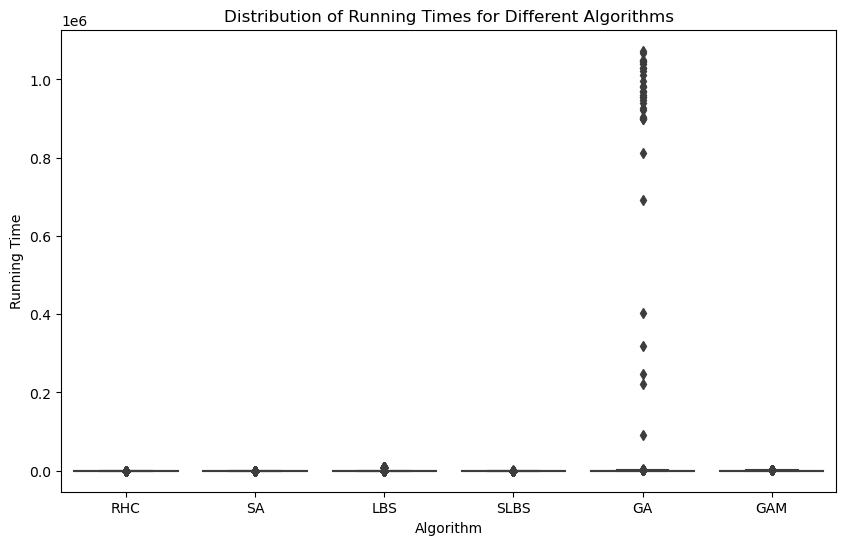

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

df_melted = df_running_times.melt(var_name="Algorithm", value_name="Running Time")

# Plot using seaborn's violinplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Algorithm", y="Running Time", data=df_melted)
plt.title("Distribution of Running Times for Different Algorithms")
plt.show()


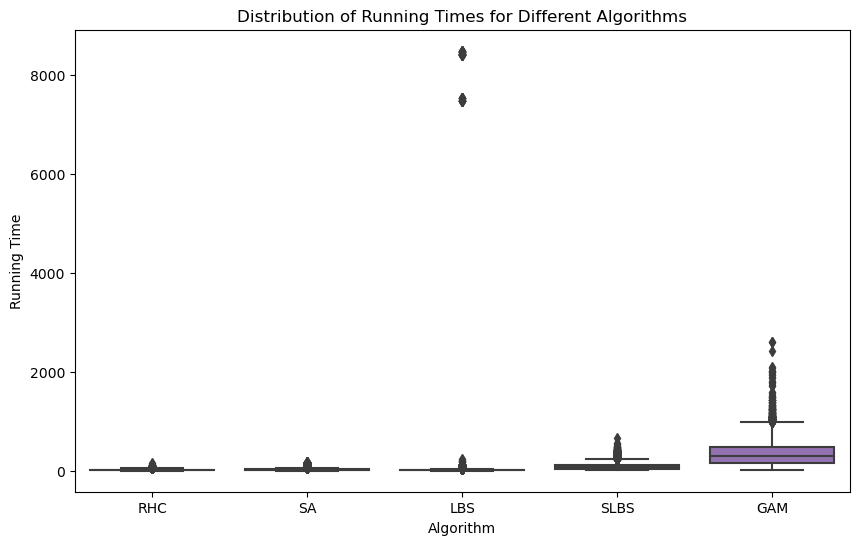

In [69]:
_df_rt = df_running_times.drop(columns=['GA'])

df_melted = _df_rt.melt(var_name="Algorithm", value_name="Running Time")

# Plot using seaborn's violinplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Algorithm", y="Running Time", data=df_melted)
plt.title("Distribution of Running Times for Different Algorithms")
plt.show()

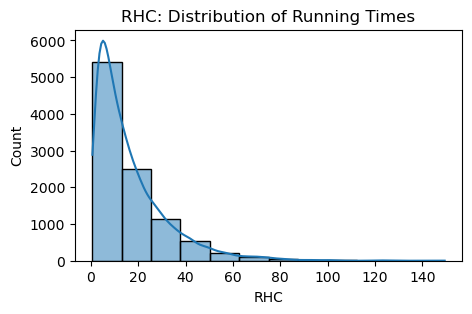

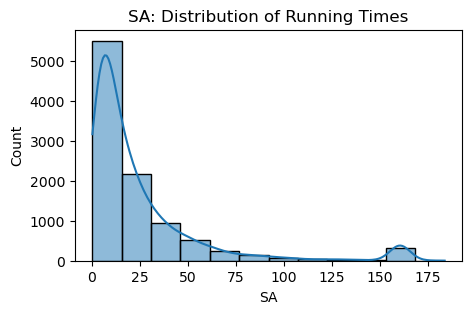

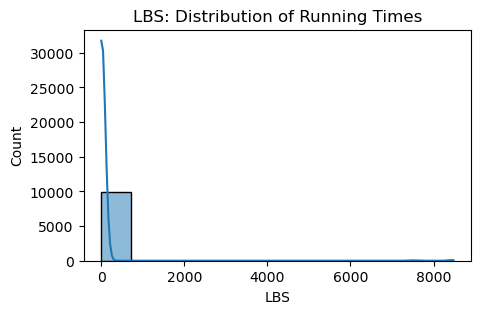

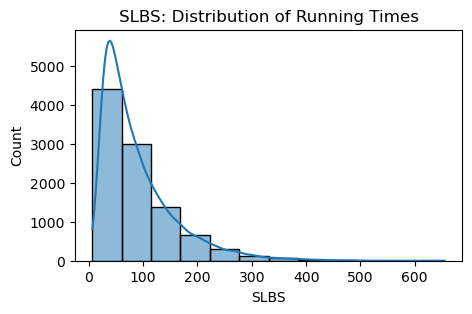

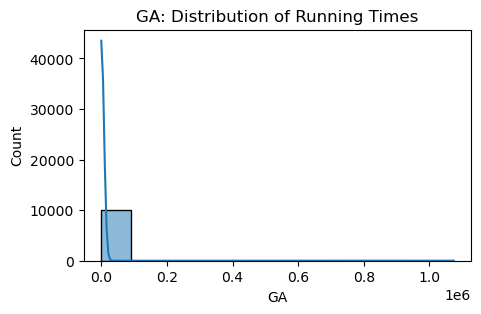

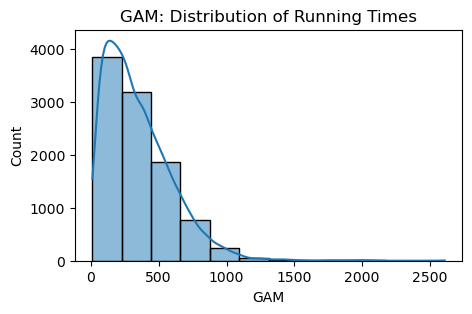

In [68]:
for c in df_running_times.columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=df_running_times[c], bins=12, kde=True)
    plt.title(f"{c}: Distribution of Running Times")
    plt.show()

#### Running time is Exponential distributed

Lambda of each value is equal to the expected value

### Conclusions

Based on the test for the 8 queens problem.

#### Efficiency
Based on running time test
- RHC gives the best average result results
- Median of RHC, SA, BS are similar.
- SLBS never failed, compared to LBS with failed a few time out of 1000 trials
- SLBS performed worse than LBS
- GA and GAM gave the worse results
- GAM performed betted than GA due to the higher number of outliers in GA
- SLBS perform better than GAM

#### Accuracy
Based on failed observation over multiple tests, ~100% means never observed so far
- Probability of find a solution: RHC ~100% SA: 96.5%, LBS 99.5%, SLBS ~100% GA 100% GAM ~100%
- Increasing SA cooling speed worsen the accuracy, decreasing the speed has improve slightly the result at expences of speed